<a href="https://colab.research.google.com/github/Ziqi-Li/GEO4162C/blob/spring-24/notebooks/Correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Correlation Analysis using Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data

Here I prepare a health data that was originally downloaded from [CDC's 500 Cities Project](https://data.cdc.gov/500-Cities-Places/500-Cities-City-level-Data-GIS-Friendly-Format-201/dxpw-cm5u).

Each row is one of the 500 largest cities in the US.
Several columns of heath statistics included including
% people who are:

- binge drinking
- having cancer
- having diabetes
- are obese
- having not good mental health
- sleeping <7 hrs


In [2]:
url = "https://raw.githubusercontent.com/Ziqi-Li/GEO4162C/main/data/heath_500_cities.csv"
city_health = pd.read_csv(url)

In [3]:
city_health

,StateAbbr,PlaceName,PlaceFIPS,Binge rate,Cancer rate,Diabetes rate,Mental health rate,Obesity rate,Sleep rate
0,AL,Birmingham,107000,11.6,5.8,16.3,16.8,41.2,41.8
1,AL,Hoover,135896,15.4,6.7,8.4,11.5,28.8,32.8
2,AL,Huntsville,137000,13.3,6.7,11.8,15.1,35.5,38.3
3,AL,Mobile,150000,13.6,6.5,14.2,16.3,37.5,39.7
4,AL,Montgomery,151000,13.2,6.1,14.2,15.8,38.4,38.1
...,...,...,...,...,...,...,...,...,...
495,WI,Madison,5548000,27.6,5.2,5.8,10.8,26.0,29.3
496,WI,Milwaukee,5553000,23.0,5.1,9.9,15.3,35.0,39.2
497,WI,Racine,5566000,23.4,6.1,9.9,13.9,39.9,39.8
498,WI,Waukesha,5584250,24.4,6.1,7.1,11.7,31.2,33.2


# Scatterplot

To make a simple scatterplot, we can use `plt.scatter(x, y)` function, and to replace `x` and `y` with the data in the table

Text(0, 0.5, '% of people with not good mental health')

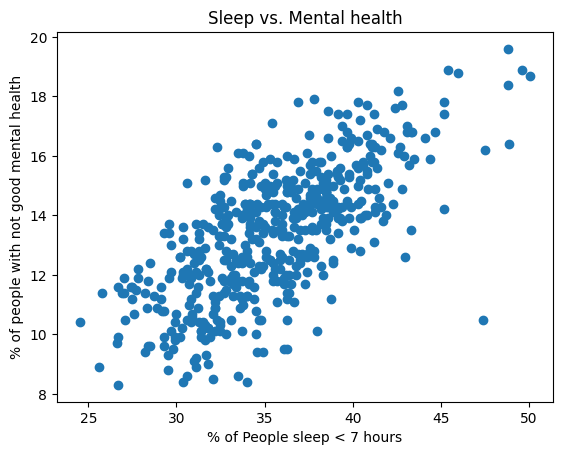

In [4]:
plt.scatter(city_health["Sleep rate"],city_health["Mental health rate"])


plt.title("Sleep vs. Mental health")
plt.xlabel("% of People sleep < 7 hours")
plt.ylabel("% of people with not good mental health")

# Correlation coefficient

Pearson: `scipy.stats.pearsonr(x, y)`

Spearman: `scipy.stats.spearmanr(x, y)`

Both results return two values. The first number is the correlation coefficient, the second number is the p-value, which indicates how significant the correlation coefficient is against a no correlation hypothesis. The interpretation of p-value falls into statistical inference, and we will talk about it more later.

In [5]:
import scipy

In [6]:
scipy.stats.pearsonr(city_health["Sleep rate"], city_health["Mental health rate"])

PearsonRResult(statistic=0.693540429144857, pvalue=6.139373756026925e-73)

In [7]:
scipy.stats.spearmanr(city_health["Sleep rate"], city_health["Mental health rate"])

SignificanceResult(statistic=0.6865294787612634, pvalue=6.165230136971697e-71)

We can see that, from both correlation coefficient, sleep and mental health have a pretty strong positive correlation.